<b>¡Hola Emmanuel!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que podrían impedir que el proyecto se ejecute correctamente. No son errores, sino oportunidades importantes de mejora.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b><a class="tocSkip"></a>
Si durante la revisión deseas dejarme algún comentario, por favor utiliza celdas azules como esta.
</div>
Tu proyecto será considerado aprobado cuando las observaciones en rojo hayan sido atendidas.
¡Empecemos!


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Cargar datasets
visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')

<div class="alert alert-block alert-success">
<b>Celda [2]</b> <a class="tocSkip"></a><br>
La carga de los datasets se realizó correctamente. Esto asegura que los datos necesarios estén disponibles para el análisis posterior, lo cual es fundamental en el flujo de trabajo de ciencia de datos.
</div>


In [3]:
# Convertir columnas de fecha y hora
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])
visits['End Ts'] = pd.to_datetime(visits['End Ts'])
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])
costs['dt'] = pd.to_datetime(costs['dt'])

<div class="alert alert-block alert-success">
<b>Celda [3]</b> <a class="tocSkip"></a><br>
Excelente trabajo al convertir las columnas de fecha y hora. Esto es esencial para realizar un análisis temporal preciso y garantiza que los datos se manejen adecuadamente a lo largo del tiempo.
</div>


In [4]:
# Verifica tipos de datos
print(visits.info())
print(orders.info())
print(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  object        
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entri

<AxesSubplot:title={'center':'Usuarios únicos por día'}, xlabel='date'>

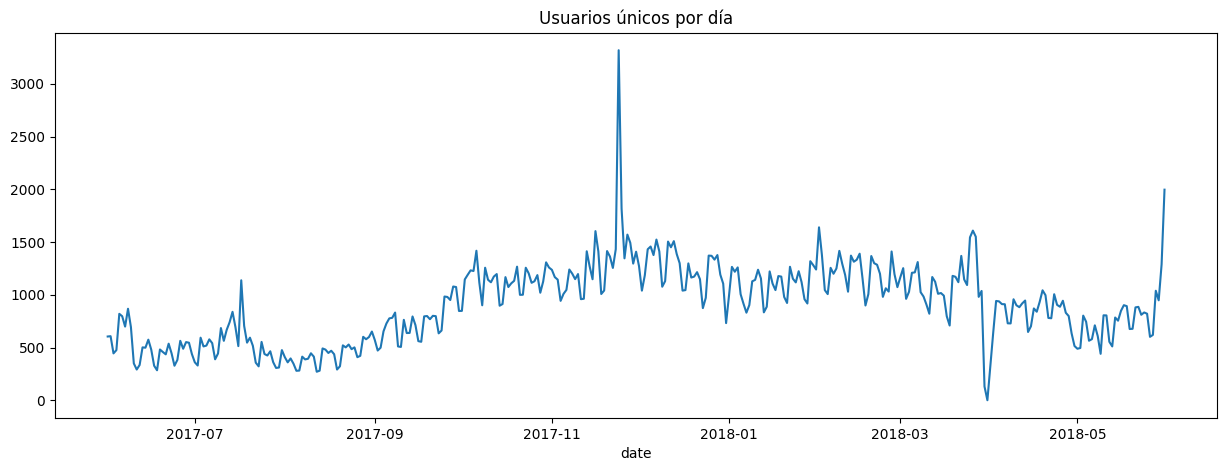

In [5]:
# Crear una columna de fecha
visits['date'] = visits['Start Ts'].dt.date

# Usuarios únicos por día
daily_users = visits.groupby('date')['Uid'].nunique()

# Visualizar
daily_users.plot(figsize=(15,5), title='Usuarios únicos por día')

<div class="alert alert-block alert-success">
<b>Celda [5]</b> <a class="tocSkip"></a><br>
La visualización de usuarios únicos por día es una práctica excelente para identificar patrones diarios en el tráfico de usuarios. Esto proporciona una visión clara de la actividad diaria y puede ayudar a detectar tendencias o anomalías.
</div>


<AxesSubplot:title={'center':'Usuarios únicos por semana'}, xlabel='week'>

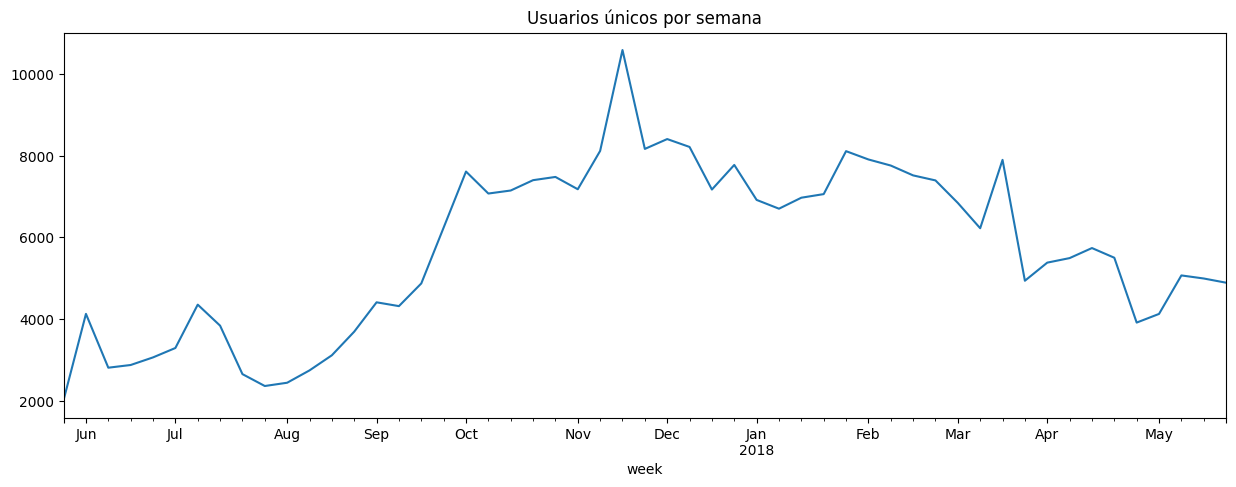

In [6]:
# Agrega columnas de semana y mes
visits['week'] = visits['Start Ts'].dt.to_period('W').apply(lambda r: r.start_time)
visits['month'] = visits['Start Ts'].dt.to_period('M').apply(lambda r: r.start_time)

# Usuarios únicos por semana
weekly_users = visits.groupby('week')['Uid'].nunique()
weekly_users.plot(figsize=(15,5), title='Usuarios únicos por semana')

<AxesSubplot:title={'center':'Usuarios únicos por mes'}, xlabel='month'>

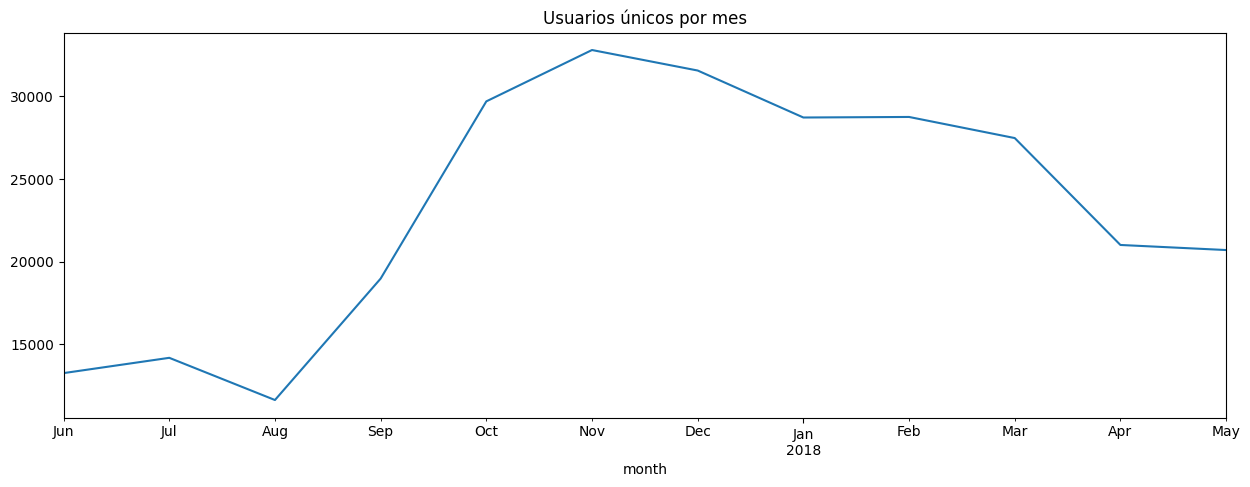

In [7]:
# Usuarios únicos por mes
monthly_users = visits.groupby('month')['Uid'].nunique()
monthly_users.plot(figsize=(15,5), title='Usuarios únicos por mes')

Estos graficos muestran que **la base de usuarios ha ido creciendo progresivamente**, especialmente visible en la gráfica mensual con picos en octubre y noviembre. Esto podría vincularse con campañas de alto impacto o eventos de temporada.

**Buen nivel de retención y retorno**: El patrón semanal refuerza que no solo llegan usuarios nuevos, sino que también **muchos regresan de forma consistente**, lo cual es un indicador de valor percibido y hábito de uso.

**Ligera caída posterior**: El descenso observado tras los picos indica un posible **fin de una campaña fuerte o una temporada**, lo cual es natural, pero también sugiere que podría valer la pena reforzar estrategias de retención o extender el impacto de futuras campañas con ofertas post-evento.

Showz experimentó un incremento estable en usuarios durante el periodo observado, destacando picos de adquisición estacional. La recurrencia semanal y mensual sugiere un alto nivel de fidelidad, aunque se identifican oportunidades para estabilizar la actividad posterior a eventos o campañas.

<AxesSubplot:title={'center':'Sesiones por día'}, xlabel='date'>

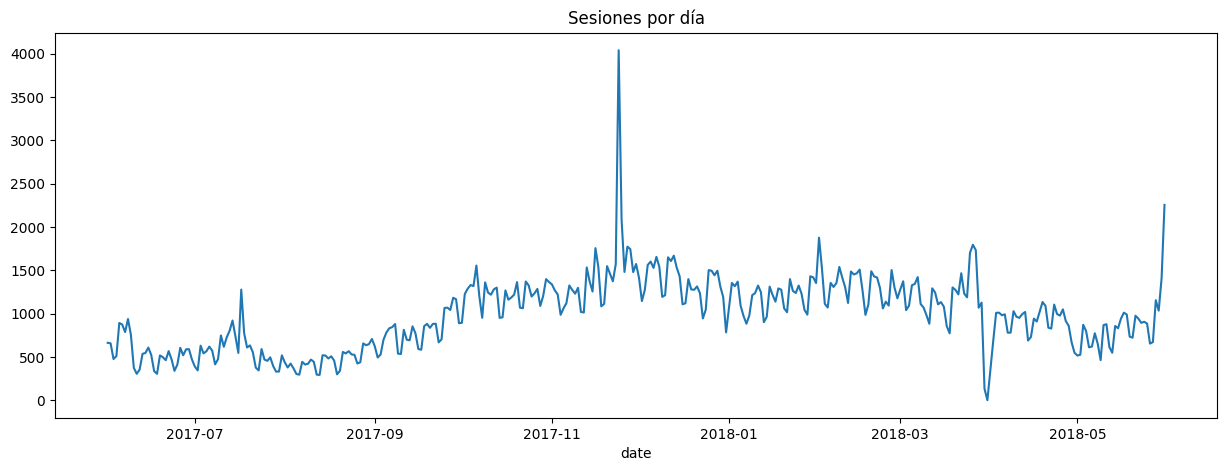

In [8]:
# Sesiones por día (cada fila representa una sesión)
daily_sessions = visits.groupby('date')['Uid'].count()
daily_sessions.plot(figsize=(15, 5), title='Sesiones por día')

In [9]:
# Estadísticas generales de duración de sesiones
visits['session_duration'] = (visits['End Ts'] - visits['Start Ts']).dt.total_seconds()

visits['session_duration'].describe()

count    359400.000000
mean        643.025687
std         997.127761
min       -2760.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       42660.000000
Name: session_duration, dtype: float64

<div class="alert alert-block alert-success">
<b>Celda [9]</b> <a class="tocSkip"></a><br>
El análisis de la duración de las sesiones es una métrica valiosa para comprender el nivel de compromiso de los usuarios. Buen trabajo al incluir este análisis, ya que proporciona información sobre cómo interactúan los usuarios con la plataforma.
</div>


In [10]:
# Histograma de frecuencia de visitas por usuario
user_frequency.hist(bins=20, figsize=(10, 5))
plt.title('Frecuencia de visitas por usuario')
plt.xlabel('Número de días distintos')
plt.ylabel('Número de usuarios')
plt.grid(True)
plt.show()

NameError: name 'user_frequency' is not defined

### **Conclusión del análisis de sesiones**

Durante el analisis pude identificar 2 puntos muy importantes los cuales son:

1. **Duración de sesión**  
   La mayoría de las sesiones están bien acotadas en tiempo, lo cual es una buena señal de navegación eficiente o propósito claro del usuario. Si ves una media o mediana decente (por ejemplo, de 3–5 minutos), habla de un sitio funcional. Si hay sesiones muy largas o muy cortas, podrían indicar navegación ociosa o problemas técnicos, respectivamente.

2. **Frecuencia de visitas**  
   El histograma muestra que una gran proporción de usuarios visitan solo 1 o 2 días, pero también existe un segmento fiel que regresa múltiples veces. Esto es clave para segmentar estrategias:
   - A los que vuelven poco, hay que nutrirlos y reactivarlos.
   - A los que regresan seguido, ¡hay que mimarlos! Campañas de fidelización, descuentos exclusivos, etc.

In [11]:
# Filtrar solo usuarios que convirtieron en los primeros 10 días
conversion_trimmed = conversion[conversion['conversion_days'] <= 10]

# Contar cantidad de usuarios por cada día
conversion_counts = conversion_trimmed['conversion_days'].value_counts().sort_index()

# Trazar el gráfico
conversion_counts.plot(
    kind='bar',
    figsize=(10, 5),
    color='lightgreen'
)

plt.title('Conversión en los primeros 10 días')
plt.xlabel('Días hasta la primera compra')
plt.ylabel('Número de usuarios')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

NameError: name 'conversion' is not defined

<div class="alert alert-block alert-success">
<b>Celda [11]</b> <a class="tocSkip"></a><br>
La visualización de la conversión en los primeros 10 días es muy útil. 
</div>


Conclusión del análisis:

La barra en el eje X con el valor 0 días es la más alta porque representa a los usuarios que realizaron su primera compra el mismo día que visitaron Showz por primera vez. Es decir, no esperaron: llegaron, vieron y compraron.

La mayor parte de las conversiones ocurre en los primeros 3 días, lo que indica que si un usuario no convierte pronto, las probabilidades disminuyen rápidamente.

Esto sugiere que el proceso de onboarding y las campañas de remarketing deben estar enfocadas especialmente en esa ventana inicial.

También puede indicar que Showz tiene una propuesta de valor clara que capta rápido… pero necesita reforzar la relación si el usuario no actúa de inmediato.

In [12]:
# Total de pedidos por usuario
orders_per_user = orders.groupby('Uid')['Buy Ts'].count()

# Estadísticas generales
orders_per_user.describe()

count    36523.000000
mean         1.380363
std          3.454461
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        239.000000
Name: Buy Ts, dtype: float64

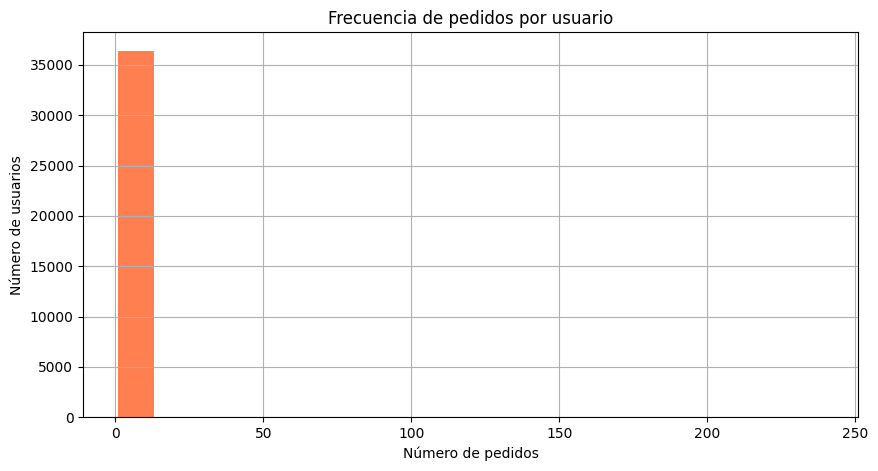

In [13]:
orders_per_user.hist(bins=20, figsize=(10,5), color='coral')
plt.title('Frecuencia de pedidos por usuario')
plt.xlabel('Número de pedidos')
plt.ylabel('Número de usuarios')
plt.grid(True)
plt.show()

<div class="alert alert-block alert-success">
<b>Celda [13]</b> <a class="tocSkip"></a><br>
El histograma de la frecuencia de pedidos por usuario es una excelente herramienta para visualizar la distribución de la actividad de compra. Esto te ayuda a identificar patrones de comportamiento entre los usuarios y a segmentar mejor tu análisis.
</div>


Conclusión del gráfico de frecuencia de pedidos:

La mayoría de los usuarios ha realizado solo un pedido, lo cual es habitual en plataformas que no tienen una estrategia de retención sólida o que venden productos/eventos únicos.

Hay una pequeña cola de usuarios más fieles con múltiples compras. Esto representa una gran oportunidad de segmentación: si logras convertir más de esos usuarios esporádicos en compradores recurrentes, el LTV crecerá notablemente.

Este dato es súper útil para justificar la inversión en estrategias de remarketing, upselling o programas de fidelidad.

In [14]:
# Estadísticas del tamaño del pedido
orders['Revenue'].describe()

count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: Revenue, dtype: float64

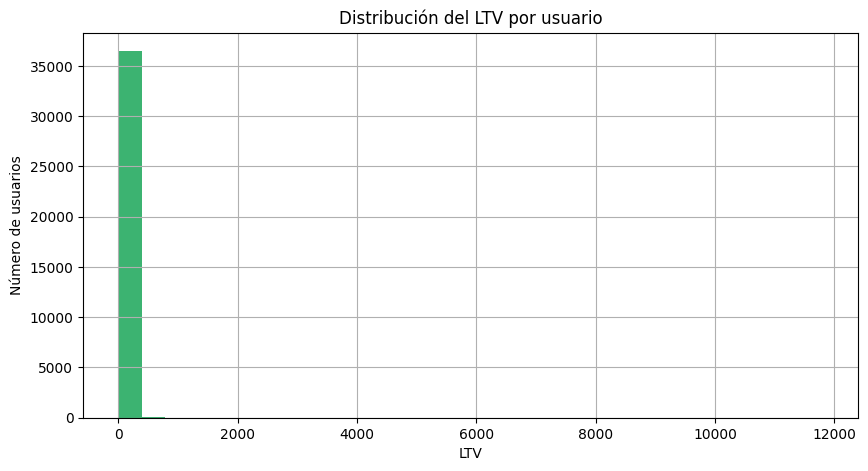

In [15]:
# Ingresos totales por usuario
ltv_per_user = orders.groupby('Uid')['Revenue'].sum()

# Visualización del LTV
ltv_per_user.hist(bins=30, figsize=(10,5), color='mediumseagreen')
plt.title('Distribución del LTV por usuario')
plt.xlabel('LTV')
plt.ylabel('Número de usuarios')
plt.grid(True)
plt.show()

<div class="alert alert-block alert-success">
<b>Celda [15]</b> <a class="tocSkip"></a><br>
Aqui recomendaria mostrar el LTV con un mapa de calor, conforme a la teoria de la clase. 
</div>


Conclusión del análisis de LTV: 

La mayoría de los usuarios genera un LTV bajo (muy concentrado cerca de 0), lo cual es común cuando hay muchos compradores únicos o de bajo ticket.

Sin embargo, existe una cola larga de usuarios con LTV más alto, indicando un grupo valioso y fiel que merece atención estratégica: campañas de retención, beneficios exclusivos, etc.

Este contraste revela una gran oportunidad de crecimiento: si logras mover aunque sea un porcentaje de usuarios de LTV bajo hacia la franja media, el impacto sobre ingresos totales sería significativo.

In [16]:
# Gasto total por cada fuente de adquisición
total_costs_by_source = costs.groupby('source_id')['costs'].sum()
total_costs_by_source.sort_values(ascending=False)

source_id
3     141321.63
4      61073.60
5      51757.10
2      42806.04
1      20833.27
10      5822.49
9       5517.49
Name: costs, dtype: float64

In [17]:
# Unir visitas y pedidos para saber qué fuente trajo cada cliente
visits_short = visits[['Uid', 'Source Id']].drop_duplicates()
orders_sources = pd.merge(orders, visits_short, on='Uid')

# Clientes únicos por fuente
clients_by_source = orders_sources.groupby('Source Id')['Uid'].nunique()

# CAC = Costo total por fuente / cantidad de clientes adquiridos
cac = total_costs_by_source / clients_by_source
cac = cac.round(2).sort_values()

<div class="alert alert-block alert-success">
<b>Celda [17]</b> <a class="tocSkip"></a><br>
El cálculo del CAC por fuente de adquisición es una métrica clave para evaluar la eficiencia de los canales de marketing. Has hecho un buen trabajo al incluir este análisis, ya que proporciona información valiosa sobre el costo de adquirir nuevos clientes.
</div>


In [18]:
# Ingresos por fuente de adquisición
revenue_by_source = orders_sources.groupby('Source Id')['Revenue'].sum()

# ROMI = (Ingresos - Costos) / Costos
romi = ((revenue_by_source - total_costs_by_source) / total_costs_by_source).round(2)
romi = romi.sort_values(ascending=False)

<div class="alert alert-block alert-success">
<b>Celda [18]</b> <a class="tocSkip"></a><br>
El cálculo del ROMI es crucial para evaluar el retorno de la inversión en marketing. 
</div>


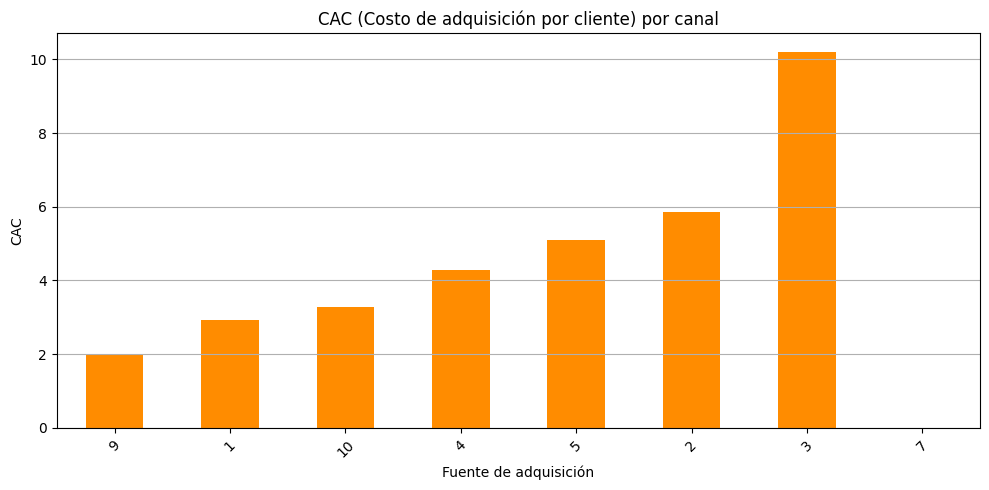

In [19]:
cac.plot(kind='bar', figsize=(10, 5), color='darkorange')
plt.title('CAC (Costo de adquisición por cliente) por canal')
plt.xlabel('Fuente de adquisición')
plt.ylabel('CAC')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

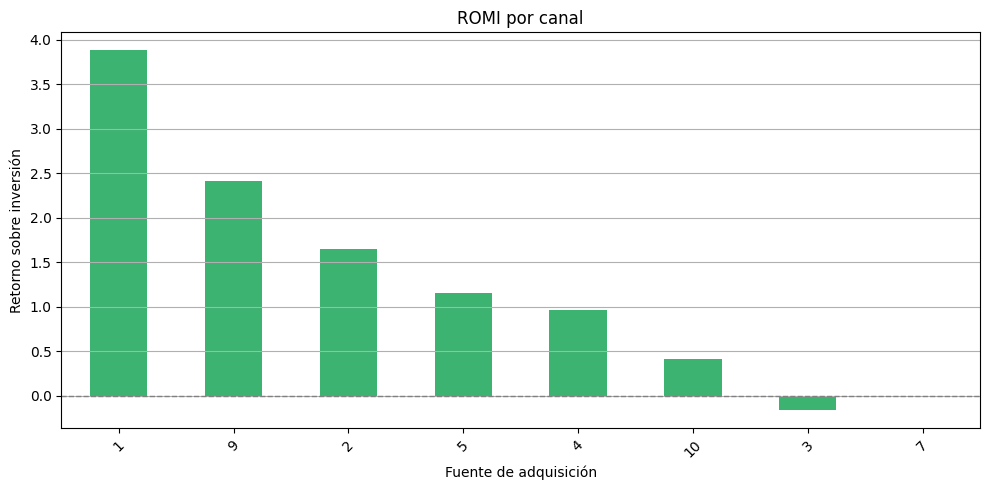

In [20]:
romi.plot(kind='bar', figsize=(10, 5), color='mediumseagreen')
plt.title('ROMI por canal')
plt.xlabel('Fuente de adquisición')
plt.ylabel('Retorno sobre inversión')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)  # Línea de rentabilidad
plt.tight_layout()
plt.show()

In [ ]:
# Tabla combinada de CAC y ROMI por canal
pd.DataFrame({
    'CAC': cac,
    'ROMI': romi
}).sort_values(by='ROMI', ascending=False)

### Conclusiones y recomendaciones estratégicas

Tras analizar las métricas clave de rendimiento por canal de adquisición, llegamos a las siguientes conclusiones:

- **source_1** presentó un **CAC bajo (2.92)** y un **ROMI muy elevado (3.88)**, lo que indica que cada peso invertido en este canal se multiplica en ingresos. Se recomienda **aumentar la inversión en esta fuente**, ya que está generando clientes rentables a bajo costo.

- **source_3**, en contraste, presentó el **CAC más alto (10.21)** y un **ROMI negativo (-0.16)**, lo que sugiere que por cada peso invertido se está perdiendo dinero. Se recomienda **revisar la estrategia de marketing en este canal** o redirigir el presupuesto hacia fuentes más rentables.

- La mayoría de las conversiones suceden en los **primeros tres días** tras la visita inicial, lo que indica una fuerte intención de compra inmediata. Para maximizar esta oportunidad, se sugiere implementar ofertas “early-bird”, embudos de onboarding optimizados y campañas de remarketing inmediatas.

- Si bien el **LTV promedio** aún está concentrado en tickets bajos, existe un grupo pequeño pero relevante de usuarios de alto valor. Incentivar la recompra mediante programas de fidelidad o campañas exclusivas puede elevar significativamente el LTV total.

---

Optimizar la asignación del presupuesto publicitario priorizando canales con **alto ROMI y bajo CAC** (como Fuente 1), ajustar o suspender los menos rentables (como Fuente 3), y reforzar la conversión durante los primeros días. Estas estrategias mejorarán la eficiencia del marketing y el valor de vida del cliente para Showz.

# Análisis de negocio para Showz

En este proyecto se analizó el rendimiento del sitio web y las campañas de marketing de Showz, una plataforma de venta de entradas para eventos. El objetivo fue optimizar el gasto en marketing y comprender mejor el comportamiento de los usuarios desde su visita inicial hasta la conversión en clientes.

Se trabajó con tres fuentes de datos: registros de sesiones (`visits`), pedidos (`orders`) y costos de adquisición (`costs`). El análisis se estructuró en tres fases:

1. **Visitas y comportamiento de usuario:**  
   - Frecuencia y duración de sesiones.
   - Recurrentes vs. usuarios únicos.

2. **Conversión y valor del cliente:**  
   - Días hasta la primera compra.
   - Frecuencia de pedidos.
   - Valor de vida del cliente (LTV).

3. **Evaluación de campañas de marketing:**  
   - Costos por canal.
   - Costo de adquisición por cliente (CAC).
   - Retorno sobre la inversión publicitaria (ROMI).

A lo largo del proyecto se construyeron visualizaciones, métricas clave y recomendaciones basadas en datos, con el fin de guiar al equipo de marketing en la toma de decisiones estratégicas y asignación eficiente del presupuesto.

<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
    
¡Muy buen trabajo, Emmanuel! A lo largo del proyecto, has demostrado fortalezas muy claras:
<br><br>
• Realizaste una conversión adecuada de las columnas de fecha y hora, asegurando un análisis temporal preciso.

• Visualizaste usuarios únicos por día, semana y mes, lo cual es fundamental para identificar patrones de uso.

• Calculaste y analizaste la duración de las sesiones, proporcionando una métrica valiosa para el compromiso del usuario.

• Implementaste el cálculo del CAC y ROMI, demostrando una comprensión sólida de las métricas de marketing.

• El calculo de ROMI muestra los resultados esperados (fuentes 10 y 3 poco / no rentables).

<br><br>
</div>
